In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 13 10:43:07 2017

@author: nandanthor
"""

#Now that we clustered our data into states, we are going to build a model to predict shelf-life


import numpy as np
import pandas as pd
#from sklearn import decomposition
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

plt.style.use('ggplot')

#Read in data
data = pd.read_excel('clustering_thesis_data.xlsx')

#Define y
y = data['Shelf-Life'].astype('|S6')

#Define X
data.drop(['Shelf-Life'], axis = 1, inplace = True)
X = data

print(X.head(5))

print(y.head(5))

   Hue Avg  Hue Min  Hue Max    %G     %Y     %B    a  a Min  a Max
0     23.2        8       29  0.00  45.60  73.93  4.7  -5.67  15.32
1     24.5       10       29  0.00  58.54  54.00  3.7  -1.70  15.12
2     26.2       16       30  0.04  86.64  20.56  2.1  -1.80  13.50
3     27.1       12       30  0.21  98.44   4.47  1.2  -1.20  16.60
4     27.3       17       31  0.10  99.82   0.63  1.0  -1.60   8.00
0    b'0'
1    b'1'
2    b'2'
3    b'3'
4    b'4'
Name: Shelf-Life, dtype: bytes48


In [7]:
#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

accur = []

#Define models we want to test
models = [KNeighborsClassifier, SVC, GaussianProcessClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GaussianNB]

model_names = ['KNeighborsClassifier', 'SVC', 'GaussianProcessClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GaussianNB']

#Test each model
for i in range(len(models)):
    model = models[i]()
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    acc = accuracy_score(predicted, y_test)
    accur.append(acc)


[('RandomForestClassifier', 0.44444444444444442), ('KNeighborsClassifier', 0.3888888888888889), ('GaussianNB', 0.375), ('DecisionTreeClassifier', 0.34722222222222221), ('GaussianProcessClassifier', 0.33333333333333331), ('SVC', 0.18055555555555555), ('AdaBoostClassifier', 0.125)]


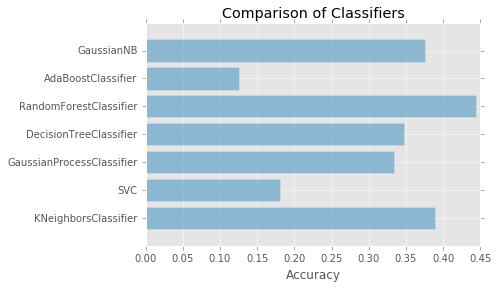

In [8]:
#Store results
accur_scores = list(zip(model_names, accur))
accur_scores.sort(key = lambda x: (x[1]), reverse = True)

print(accur_scores)
%matplotlib inline
y_pos = np.arange(len(model_names))
plt.barh(y_pos, accur, align='center', alpha = 0.5)
plt.yticks(y_pos, model_names)
plt.xlabel('Accuracy')
plt.title('Comparison of Classifiers')
plt.show()

In [ ]:
#We have models that can predict shelf-life of bananas at about 50% accuracy